Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [45]:
# Import the data for the graph
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.tail(1)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


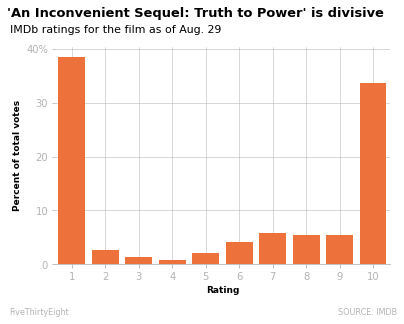

In [49]:
import matplotlib.pyplot as plt

# get the ratings for all IMDB users
ratings = df.iloc[-1,17:27].apply(float).to_numpy()
index = range(1,11)

# create the figure and axis
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot() #1, 1, 1, aspect=1)

ax.set_xlim(0.5, 10.5)

grey = '0.7'  # the font and line color used throughout

plt.xticks(index)
plt.yticks(range(0,50,10))
ax.set_yticklabels(labels=[0,10,20,30,'40%'])
ax.tick_params(which='major', color=grey, labelcolor=grey)
ax.set_xlabel("Rating", fontsize=9, fontweight='bold')
ax.set_ylabel("Percent of total votes", fontsize=9, fontweight='bold')

# Hide the right and top spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(grey)

ax.grid(linestyle="-", linewidth=0.5, color=grey, zorder=1)

ax.bar(index, ratings, color='#ED713A', zorder=2)

# fontname='Atlas Grotesk'
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             x=0.42, y=1.11, fontsize=13, fontweight=550)
fig.text(s='IMDb ratings for the film as of Aug. 29', fontsize=11,
         x=0.02, y=0.93)

creditfont = {'fontsize':8, 'color':grey}
fig.text(s='FiveThirtyEight', fontdict=creditfont, x=0.02, y=-0.05)
fig.text(s='SOURCE: IMDB', fontdict=creditfont, x=0.78, y=-0.05)

fig.show()
# https://www.myfonts.com/WhatTheFont/forum/case/728911/

In [182]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
display(example)

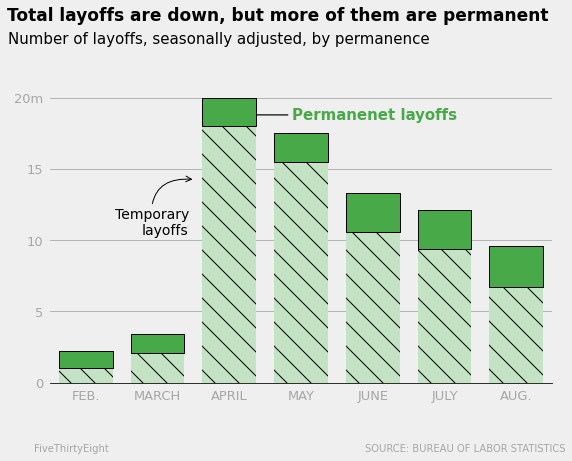

In [192]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionStyle

# Create the Figure and Axis
fig = plt.figure(figsize=(9, 5.5), facecolor='0.9375')
ax = fig.add_subplot(facecolor='0.9375', xlim=(-0.5,6.5))
fte_grey = '0.65'  # the font and line color used throughout
full_green = '#48A949'

#  Title and Subtitle
titlefont = {'fontsize':17, 'weight':550}
ax.set_title("Total layoffs are down, but more of them are permanent",
             fontdict=titlefont, ha='left', x=-0.085, y=1.19)
fig.text(s='Number of layoffs, seasonally adjusted, by permanence',
         fontsize=15, x=0.06, y=0.98)
# Font Atlas Grotesk.

# Axis Ticks
plt.xticks(range(7))
plt.yticks(range(0,25,5))
plt.tick_params(reset=True, axis='both', which='both',
                bottom=False, top=False, right=False, left=False)
# Spines
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Axis Labels
axisfont = {'family':'sans-serif','fontsize':13, 'color':fte_grey}
x_labels = ['FEB.','MARCH','APRIL','MAY','JUNE','JULY','AUG.']
ax.set_yticklabels(labels=y_labels, fontdict=axisfont)
y_labels = np.linspace(0,20, num=5, endpoint=True, dtype='int').astype('str')
y_labels[-1] += 'm'
ax.set_xticklabels(labels=x_labels, fontdict=axisfont)
# The axis looks like Decima Mono X, Decima Mono X Bold, Decima Mono Pro, or Decima Mono.

# Gridlines
ax.grid(linestyle="-", linewidth=0.8, color=fte_grey, axis='y', zorder=1)

# Bar Plots
ind = range(7)
temp_layoffs = [1.0, 2.1, 18., 15.5, 10.6, 9.4, 6.7]
perm_layoffs = [1.2, 1.3, 2.0, 2.0, 2.7, 2.7, 2.9]
hatches = '\\'
# ax.lines = {'lw':2, 'color':'#C3E3C4'}
plt.bar(ind, temp_layoffs, width=0.75, color='#C3E3C4', zorder=2, hatch='\\')
plt.bar(ind, perm_layoffs, width=0.75, color=full_green, zorder=3,
        bottom=temp_layoffs, edgecolor='k', linewidth=1)
# I'd really love to get the hashed lower bar to match better, but I'm
# not finding much in the docs to allow it.

# Annotations
curve = ConnectionStyle('arc3',	rad=-0.6)
arrow = {'arrowstyle':'->', 'connectionstyle':curve, 'color':'black'}
ax.annotate('Temporary\nlayoffs', xy=(0.34, 0.61), xytext=(0.33, 0.49), 
            xycoords='figure fraction', fontsize=14,
            ha='right', arrowprops=arrow)

line = {'arrowstyle':'-', 'lw':1.2}
ax.annotate('Permanenet layoffs', xy=(0.445, 0.75), xytext=(0.51, 0.74), 
            xycoords='figure fraction', fontsize=15, fontweight='bold',
            color=full_green, ha='left', arrowprops=line)

# Credits
creditfont = {'fontsize':10, 'color':fte_grey}
fig.text(s='FiveThirtyEight', fontdict=creditfont, x=0.10, y=-0.05)
fig.text(s='SOURCE: BUREAU OF LABOR STATISTICS', fontdict=creditfont,
         ha='right', x=0.92, y=-0.05)

plt.show()

In [11]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2020/09/atdPaineWolfe.JOBS_.0904-3.png'
example = Image(url=url, width=575)
display(example)
# https://fivethirtyeight.com/features/the-easy-part-of-the-economic-recovery-might-be-over/

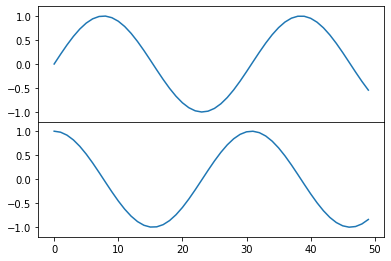

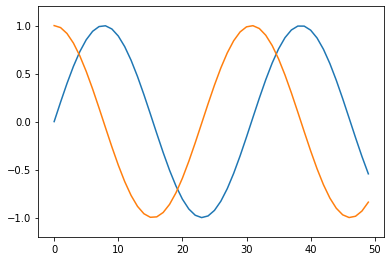

In [ ]:
# what's the difference between several plot on one axis, vs several axes?
import matplotlib.pyplot as plt
import numpy as np

# fig1, [ax1, ax2] = plt.subplots(nrows=2)
fig1 = plt.figure()
ax1 = fig1.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[],
                   ylim=(-1.2,1.2))
ax2 = fig1.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2,1.2))

x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

fig2 = plt.figure()
at1 = fig2.add_axes([0.1, 0.8, 0.8, 0.8],
                   ylim=(-1.2,1.2))

x = np.linspace(0,10)
at1.plot(np.sin(x))
at1.plot(np.cos(x))

plt.show()


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here